In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from ipykernel import kernelapp as app

In [2]:
sys.path.append('./../../')

In [3]:
from codec import ImageCodec
import src.ImageCodec.quantization as quant

# 1 JPEG有损压缩效果展示

## 1.1 量化矩阵：亮度量化和色度量化

In [4]:
# 高质量量化矩阵
# src = https://www.impulseadventure.com/photo/jpeg-quantization-lookup.html?src1=532
# 亮度
display(quant.canon_digital_fine_lum)
# 色度
display(quant.canon_digital_fine_chr)

# 低质量量化矩阵

display(quant.slide_42_matrix)

array([[ 1,  1,  1,  2,  3,  6,  8, 10],
       [ 1,  1,  2,  3,  4,  8,  9,  8],
       [ 2,  2,  2,  3,  6,  8, 10,  8],
       [ 2,  2,  3,  4,  7, 12, 11,  9],
       [ 3,  3,  8, 11, 10, 16, 15, 11],
       [ 3,  5,  8, 10, 12, 15, 16, 13],
       [ 7, 10, 11, 12, 15, 17, 17, 14],
       [14, 13, 13, 15, 15, 14, 14, 14]])

array([[ 4,  4,  5,  9, 15, 26, 26, 26],
       [ 4,  4,  5, 10, 19, 26, 26, 26],
       [ 5,  5,  8,  9, 26, 26, 26, 26],
       [ 9, 10,  9, 13, 26, 26, 26, 26],
       [15, 19, 26, 26, 26, 26, 26, 26],
       [26, 26, 26, 26, 26, 26, 26, 26],
       [26, 26, 26, 26, 26, 26, 26, 26],
       [26, 26, 26, 26, 26, 26, 26, 26]])

array([[ 16,  11,  10,  16,  24,  40,  51,  56],
       [ 12,  12,  14,  19,  26,  58,  60,  55],
       [ 14,  13,  16,  24,  40,  57,  69,  56],
       [ 14,  17,  22,  29,  51,  87,  80,  62],
       [ 18,  22,  37,  56,  68, 109, 103,  77],
       [ 24,  35,  55,  64,  81, 104, 113,  92],
       [ 49,  64,  78,  87, 103, 121, 120, 101],
       [ 72,  92,  95,  98, 112, 100, 103,  99]])

In [7]:
# 加载图像压缩类
def loss_compression_exp(image_path, quant_matrix, axes):
    compressor = ImageCodec(image_path, quantization=quant_matrix, gray=False)
    compressor.export_image(axes=axes)
    return compressor

## 1.2 Lena图

Before Clipping: Src_min = -2, Src_max = 255, Dst_min = -27, Dst_max = 272
Before Clipping: Src_min = -2, Src_max = 255, Dst_min = -23, Dst_max = 267
>>> High Quality
Before Clipping: Src_min = -2, Src_max = 255, Dst_min = -23, Dst_max = 267
MSE: 7.53390, Sqrt_MSE: 2.74480, MSN_DB: 33.85867, MSN: 2431.45929, Sqrt_MSN: 49.30983
>>>
>>> Low Quality
Before Clipping: Src_min = -2, Src_max = 255, Dst_min = -27, Dst_max = 272
MSE: 88.62958, Sqrt_MSE: 9.41433, MSN_DB: 23.10554, MSN: 204.43428, Sqrt_MSN: 14.29805
>>>
左起：   原图    高质量压缩图    低质量压缩图


/usr/local/Caskroom/miniconda/base/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


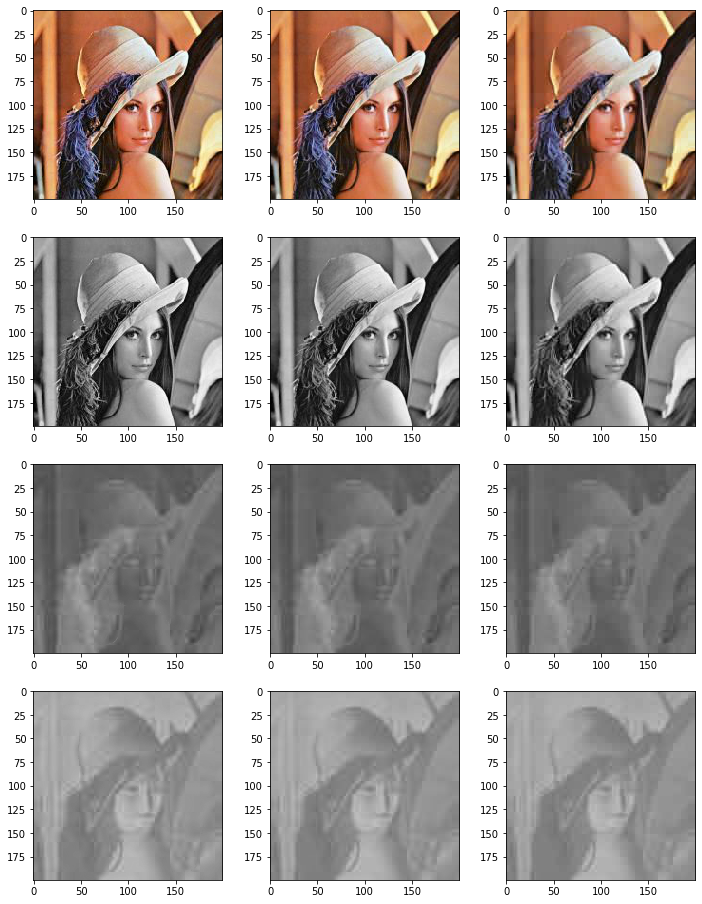

In [10]:
# 获取高低质量的量化矩阵
high_quantize_matrix = [quant.canon_digital_fine_lum, quant.canon_digital_fine_chr]
low_quantize_matrix = quant.slide_42_matrix

# 构建绘图画布
fig, axes = plt.subplots(4, 3, figsize=(12, 16))

low_quality = loss_compression_exp('image/lena.jpg', low_quantize_matrix, axes[:, 1:3])
high_quality = loss_compression_exp('image/lena.jpg', high_quantize_matrix, axes[:, 0:2])

print('>>> High Quality')
high_quality.quality_evaluate()
print('>>>')
print('>>> Low Quality')
low_quality.quality_evaluate()
print('>>>')
print('左起：   原图    高质量压缩图    低质量压缩图')
print('从上至下：彩色图 Y U V')
fig.show()

## 1.3 水波纹图

Before Clipping: Src_min = -3, Src_max = 255, Dst_min = -31, Dst_max = 276
Before Clipping: Src_min = -3, Src_max = 255, Dst_min = -25, Dst_max = 270
>>> High Quality
Before Clipping: Src_min = -3, Src_max = 255, Dst_min = -25, Dst_max = 270
MSE: 3.90329, Sqrt_MSE: 1.97567, MSN_DB: 36.47934, MSN: 4445.63874, Sqrt_MSN: 66.67562
>>>
>>> Low Quality
Before Clipping: Src_min = -3, Src_max = 255, Dst_min = -31, Dst_max = 276
MSE: 57.34626, Sqrt_MSE: 7.57273, MSN_DB: 24.76663, MSN: 299.68342, Sqrt_MSN: 17.31137
>>>
左起：   原图    高质量压缩图    低质量压缩图
从上至下：彩色图 Y U V


/usr/local/Caskroom/miniconda/base/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


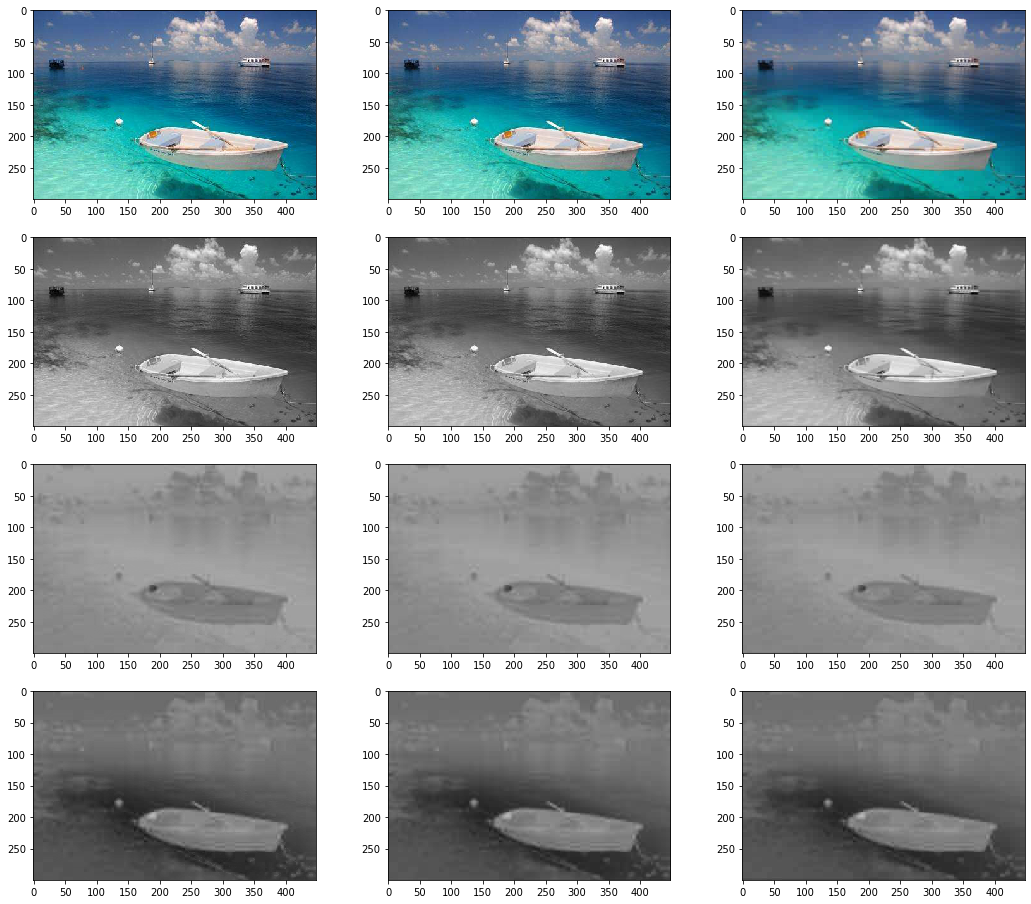

In [16]:
# 获取高低质量的量化矩阵
high_quantize_matrix = [quant.canon_digital_fine_lum, quant.canon_digital_fine_chr]
low_quantize_matrix = quant.slide_42_matrix

# 构建绘图画布
fig, axes = plt.subplots(4, 3, figsize=(18, 16))

low_quality = loss_compression_exp('image/water.jpeg', low_quantize_matrix, axes[:, 1:3])
high_quality = loss_compression_exp('image/water.jpeg', high_quantize_matrix, axes[:, 0:2])

print('>>> High Quality')
high_quality.quality_evaluate()
print('>>>')
print('>>> Low Quality')
low_quality.quality_evaluate()
print('>>>')
print('左起：   原图    高质量压缩图    低质量压缩图')
print('从上至下：彩色图 Y U V')
fig.show()